# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [206]:
# Import essential libraries for data manipulation and analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split


## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [207]:
# Importing the file porter_data_1.csv
porter = pd.read_csv("porter_data_1.csv")
porter.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,34.44
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,27.60
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,11.56
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,31.80
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,8.20


In [208]:
print(porter.dtypes)

market_id                   float64
created_at                   object
actual_delivery_time         object
store_primary_category        int64
order_protocol              float64
total_items                   int64
subtotal                      int64
num_distinct_items            int64
min_item_price                int64
max_item_price                int64
total_onshift_dashers       float64
total_busy_dashers          float64
total_outstanding_orders    float64
distance                    float64
dtype: object


In [209]:
porter.describe()

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance
count,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000
mean,2.743726,35.887949,2.911752,3.204976,2697.111147,2.675060,684.965433,1160.158616,44.918664,41.861381,58.230115,21.843090
std,1.330963,20.728254,1.513128,2.674055,1828.554893,1.625681,519.882924,560.828571,34.544724,32.168505,52.731043,8.748712
min,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000
25%,2.000000,18.000000,1.000000,2.000000,1412.000000,1.000000,299.000000,799.000000,17.000000,15.000000,17.000000,15.360000
50%,2.000000,38.000000,3.000000,3.000000,2224.000000,2.000000,595.000000,1095.000000,37.000000,35.000000,41.000000,21.760000
75%,4.000000,55.000000,4.000000,4.000000,3410.000000,3.000000,942.000000,1395.000000,66.000000,63.000000,85.000000,28.120000
max,6.000000,72.000000,7.000000,411.000000,26800.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,83.520000


## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [210]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
porter['actual_delivery_time'] = pd.to_datetime(porter['actual_delivery_time'])
porter['created_at'] = pd.to_datetime(porter['created_at'])

print(porter.dtypes)

market_id                          float64
created_at                  datetime64[ns]
actual_delivery_time        datetime64[ns]
store_primary_category               int64
order_protocol                     float64
total_items                          int64
subtotal                             int64
num_distinct_items                   int64
min_item_price                       int64
max_item_price                       int64
total_onshift_dashers              float64
total_busy_dashers                 float64
total_outstanding_orders           float64
distance                           float64
dtype: object


##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [211]:
# Convert categorical features to category type
categorical_cols = ['market_id', 'store_primary_category', 'order_protocol']
for col in categorical_cols:
    porter[col] = porter[col].astype('category')
print(porter.dtypes)

market_id                         category
created_at                  datetime64[ns]
actual_delivery_time        datetime64[ns]
store_primary_category            category
order_protocol                    category
total_items                          int64
subtotal                             int64
num_distinct_items                   int64
min_item_price                       int64
max_item_price                       int64
total_onshift_dashers              float64
total_busy_dashers                 float64
total_outstanding_orders           float64
distance                           float64
dtype: object


In [212]:
porter.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,34.44
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,27.60
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,11.56
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,31.80
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,8.20


#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [213]:
# Calculate time taken in minutes
porter['delivery_time_timedelta'] = porter['actual_delivery_time'] - porter['created_at']
porter['time_taken'] = porter['delivery_time_timedelta'].dt.total_seconds() / 60

porter[['created_at', 'actual_delivery_time', 'delivery_time_timedelta', 'time_taken']].head()

,created_at,actual_delivery_time,delivery_time_timedelta,time_taken
0,2015-02-06 22:24:17,2015-02-06 23:11:17,0 days 00:47:00,47.0
1,2015-02-10 21:49:25,2015-02-10 22:33:25,0 days 00:44:00,44.0
2,2015-02-16 00:11:35,2015-02-16 01:06:35,0 days 00:55:00,55.0
3,2015-02-12 03:36:46,2015-02-12 04:35:46,0 days 00:59:00,59.0
4,2015-01-27 02:12:36,2015-01-27 02:58:36,0 days 00:46:00,46.0


##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [214]:
# Extract the hour and day of week from the 'created_at' timestamp
porter_time = porter
porter_time['hour_of_day'] = porter_time['created_at'].dt.hour
porter_time['day_of_week'] = porter_time['created_at'].dt.dayofweek

# Create a categorical feature 'isWeekend'
porter_time['isWeekend'] = porter_time['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

#TODO: Label the hour of the day with

# bins = [0, 5, 10, 14, 17, 21, 24]
# labels = [0,  #'early_morning',
#           1,  #'morning',
#           2,  #'lunch',
#           3,  #'afternoon',
#           4,  #'dinner',
#           5,  #'late_night'
# ]
# porter_time['time_category'] = pd.cut(
#     porter_time['hour_of_day'],
#     bins=bins,
#     labels=labels,
#     right=False,        # Makes the intervals [left, right) (inclusive left, exclusive right)
#     include_lowest=True # Ensures the very first value (0) is included
# )

porter_time[['hour_of_day', 'day_of_week', 'isWeekend']].head()


,hour_of_day,day_of_week,isWeekend
0,22,4,0
1,21,1,0
2,0,0,0
3,3,3,0
4,2,1,0


In [215]:
# Drop unnecessary columns
porter_time.drop(['created_at', 'actual_delivery_time', 'day_of_week', 'delivery_time_timedelta'], axis=1, inplace=True)
porter = porter_time

porter.head()

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,time_taken,hour_of_day,isWeekend
0,1.0,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,34.44,47.0,22,0
1,2.0,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,27.60,44.0,21,0
2,2.0,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,11.56,55.0,0,0
3,1.0,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,31.80,59.0,3,0
4,1.0,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,8.20,46.0,2,0


#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [216]:
# Define target variable (y) and features (X)

y = porter['time_taken']
variables_all = ['market_id', 'store_primary_category', 'order_protocol', 'subtotal', 'num_distinct_items',
                 'min_item_price',
                 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders',
                 'distance',
                 'hour_of_day', 'isWeekend']
X = porter[variables_all]



##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [217]:
# Split data into training and testing sets

porter_train, porter_test = train_test_split(porter, train_size=0.7, test_size=0.3, random_state=100)
print(porter_train.shape)
print(porter_test.shape)


(123043, 15)
(52734, 15)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [218]:
# Define numerical and categorical columns for easy EDA and data manipulation
categorical_cols = ['market_id', 'store_primary_category', 'order_protocol', 'isWeekend']
numerical_cols = porter_train.drop(columns=categorical_cols).columns.tolist()
print(numerical_cols)


['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'time_taken', 'hour_of_day']


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

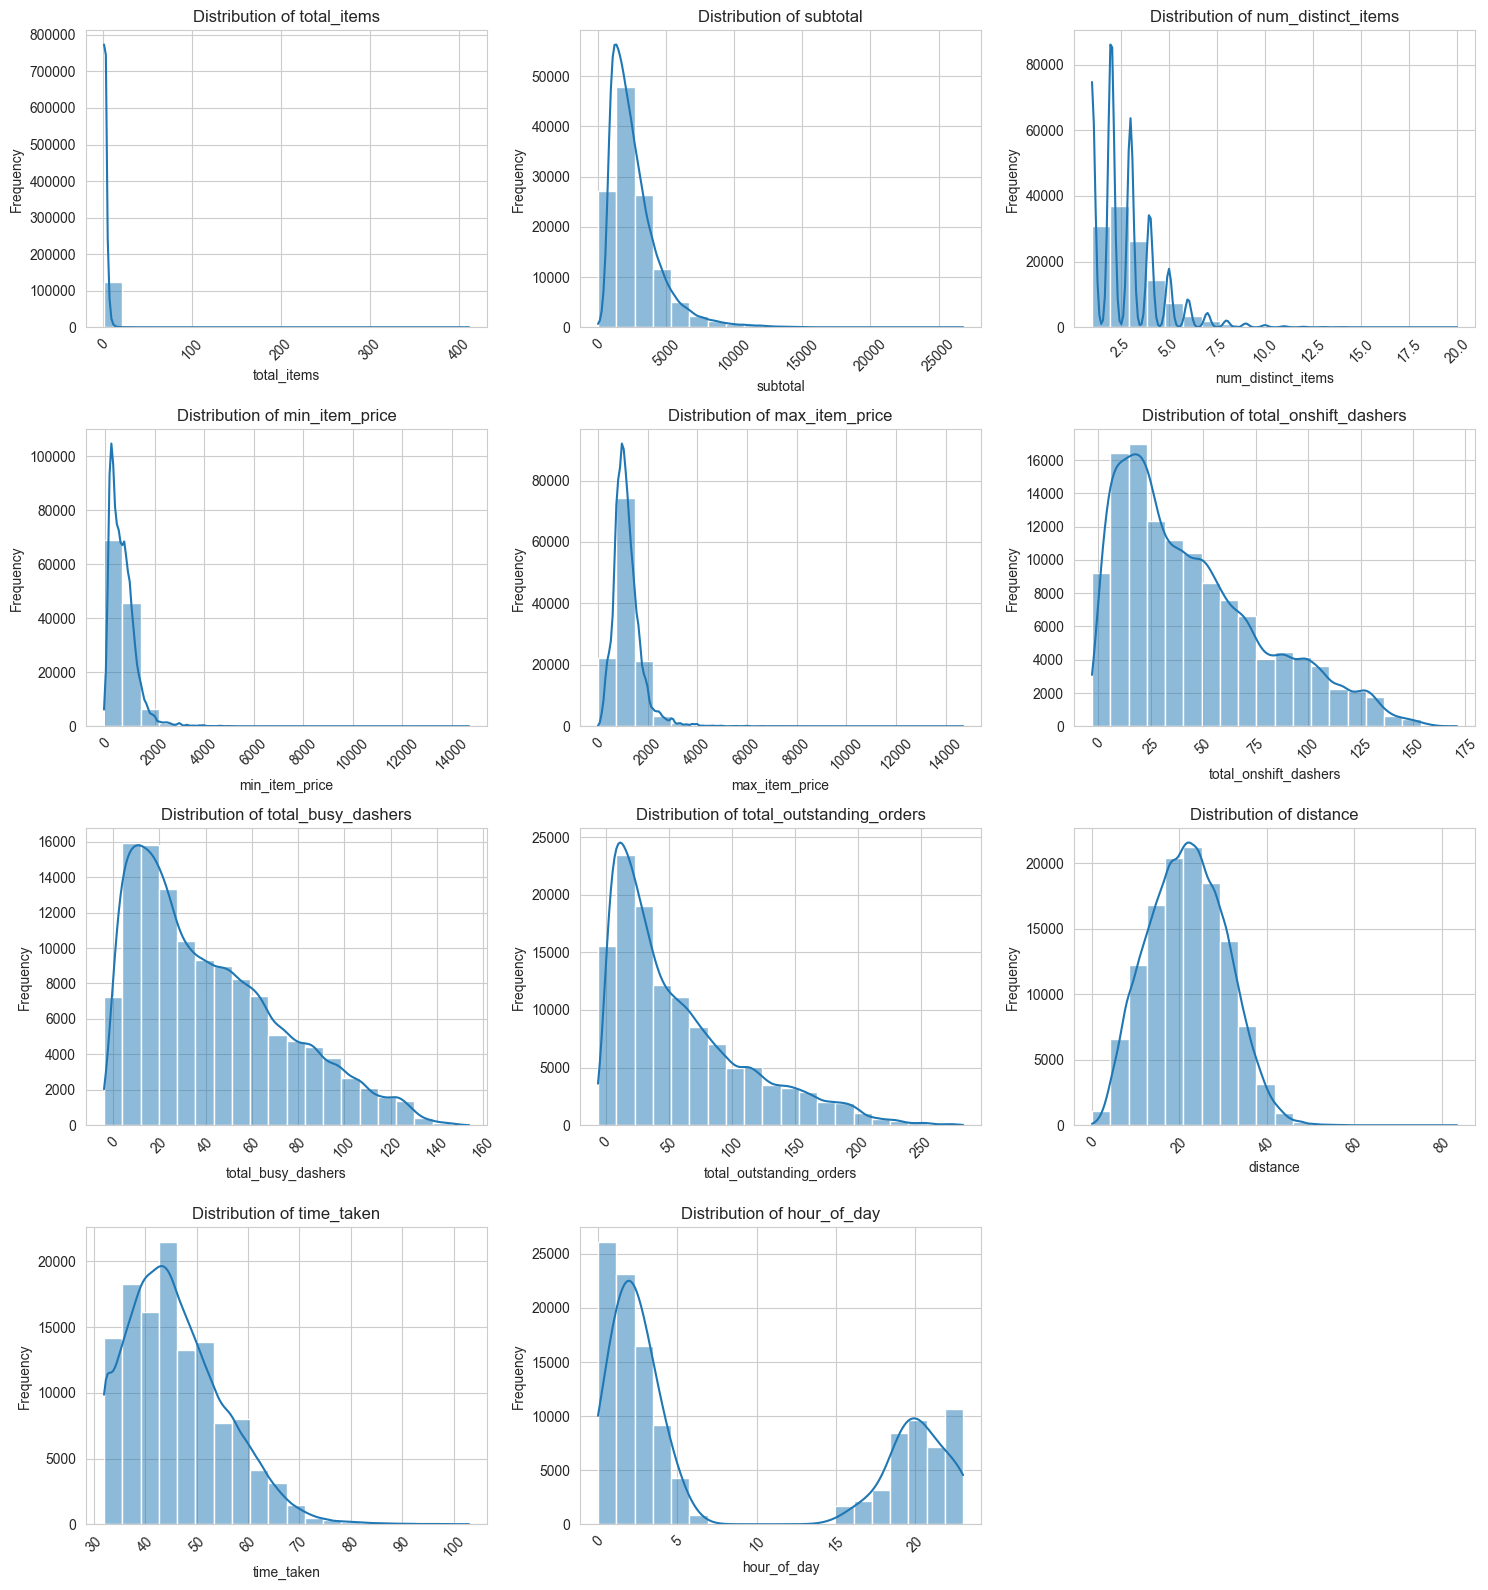

In [219]:
# Plot distributions for all numerical columns
n_variables_cols = len(numerical_cols)
n_cols = 3
n_rows = (n_variables_cols + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 5, n_rows * 4))
for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(porter_train[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

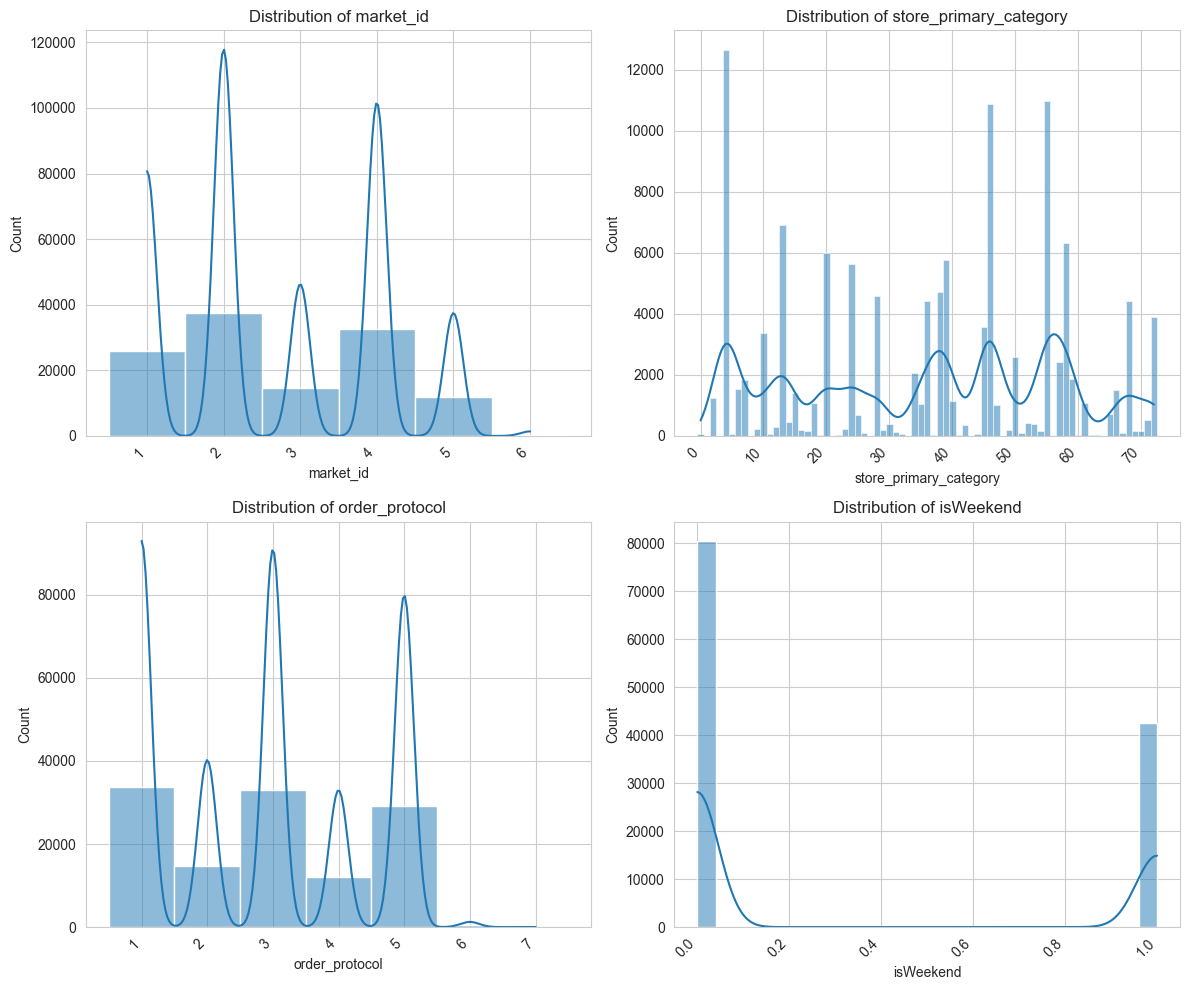

In [220]:
# Distribution of categorical columns
n_categorical_cols = len(categorical_cols)
n_cols = 2
n_rows = (n_categorical_cols + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 6, n_rows * 5))

for i, col in enumerate(categorical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(data=porter_train, x=col, kde=True)

    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

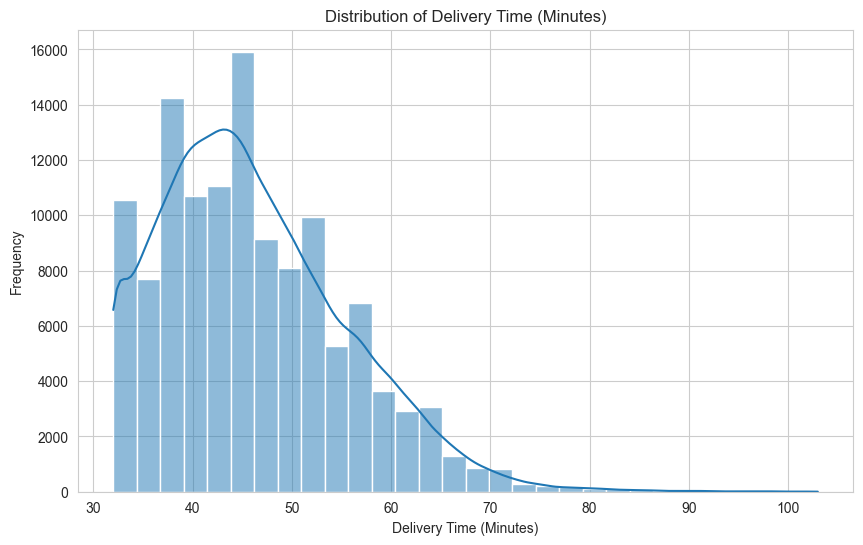

In [221]:
# Distribution of time_taken
plt.figure(figsize=(10, 6))

# Plotting a histogram with KDE
sns.histplot(data=porter_train, x='time_taken', kde=True, bins=30)
plt.title('Distribution of Delivery Time (Minutes)')
plt.xlabel('Delivery Time (Minutes)')
plt.ylabel('Frequency')
plt.show()


#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

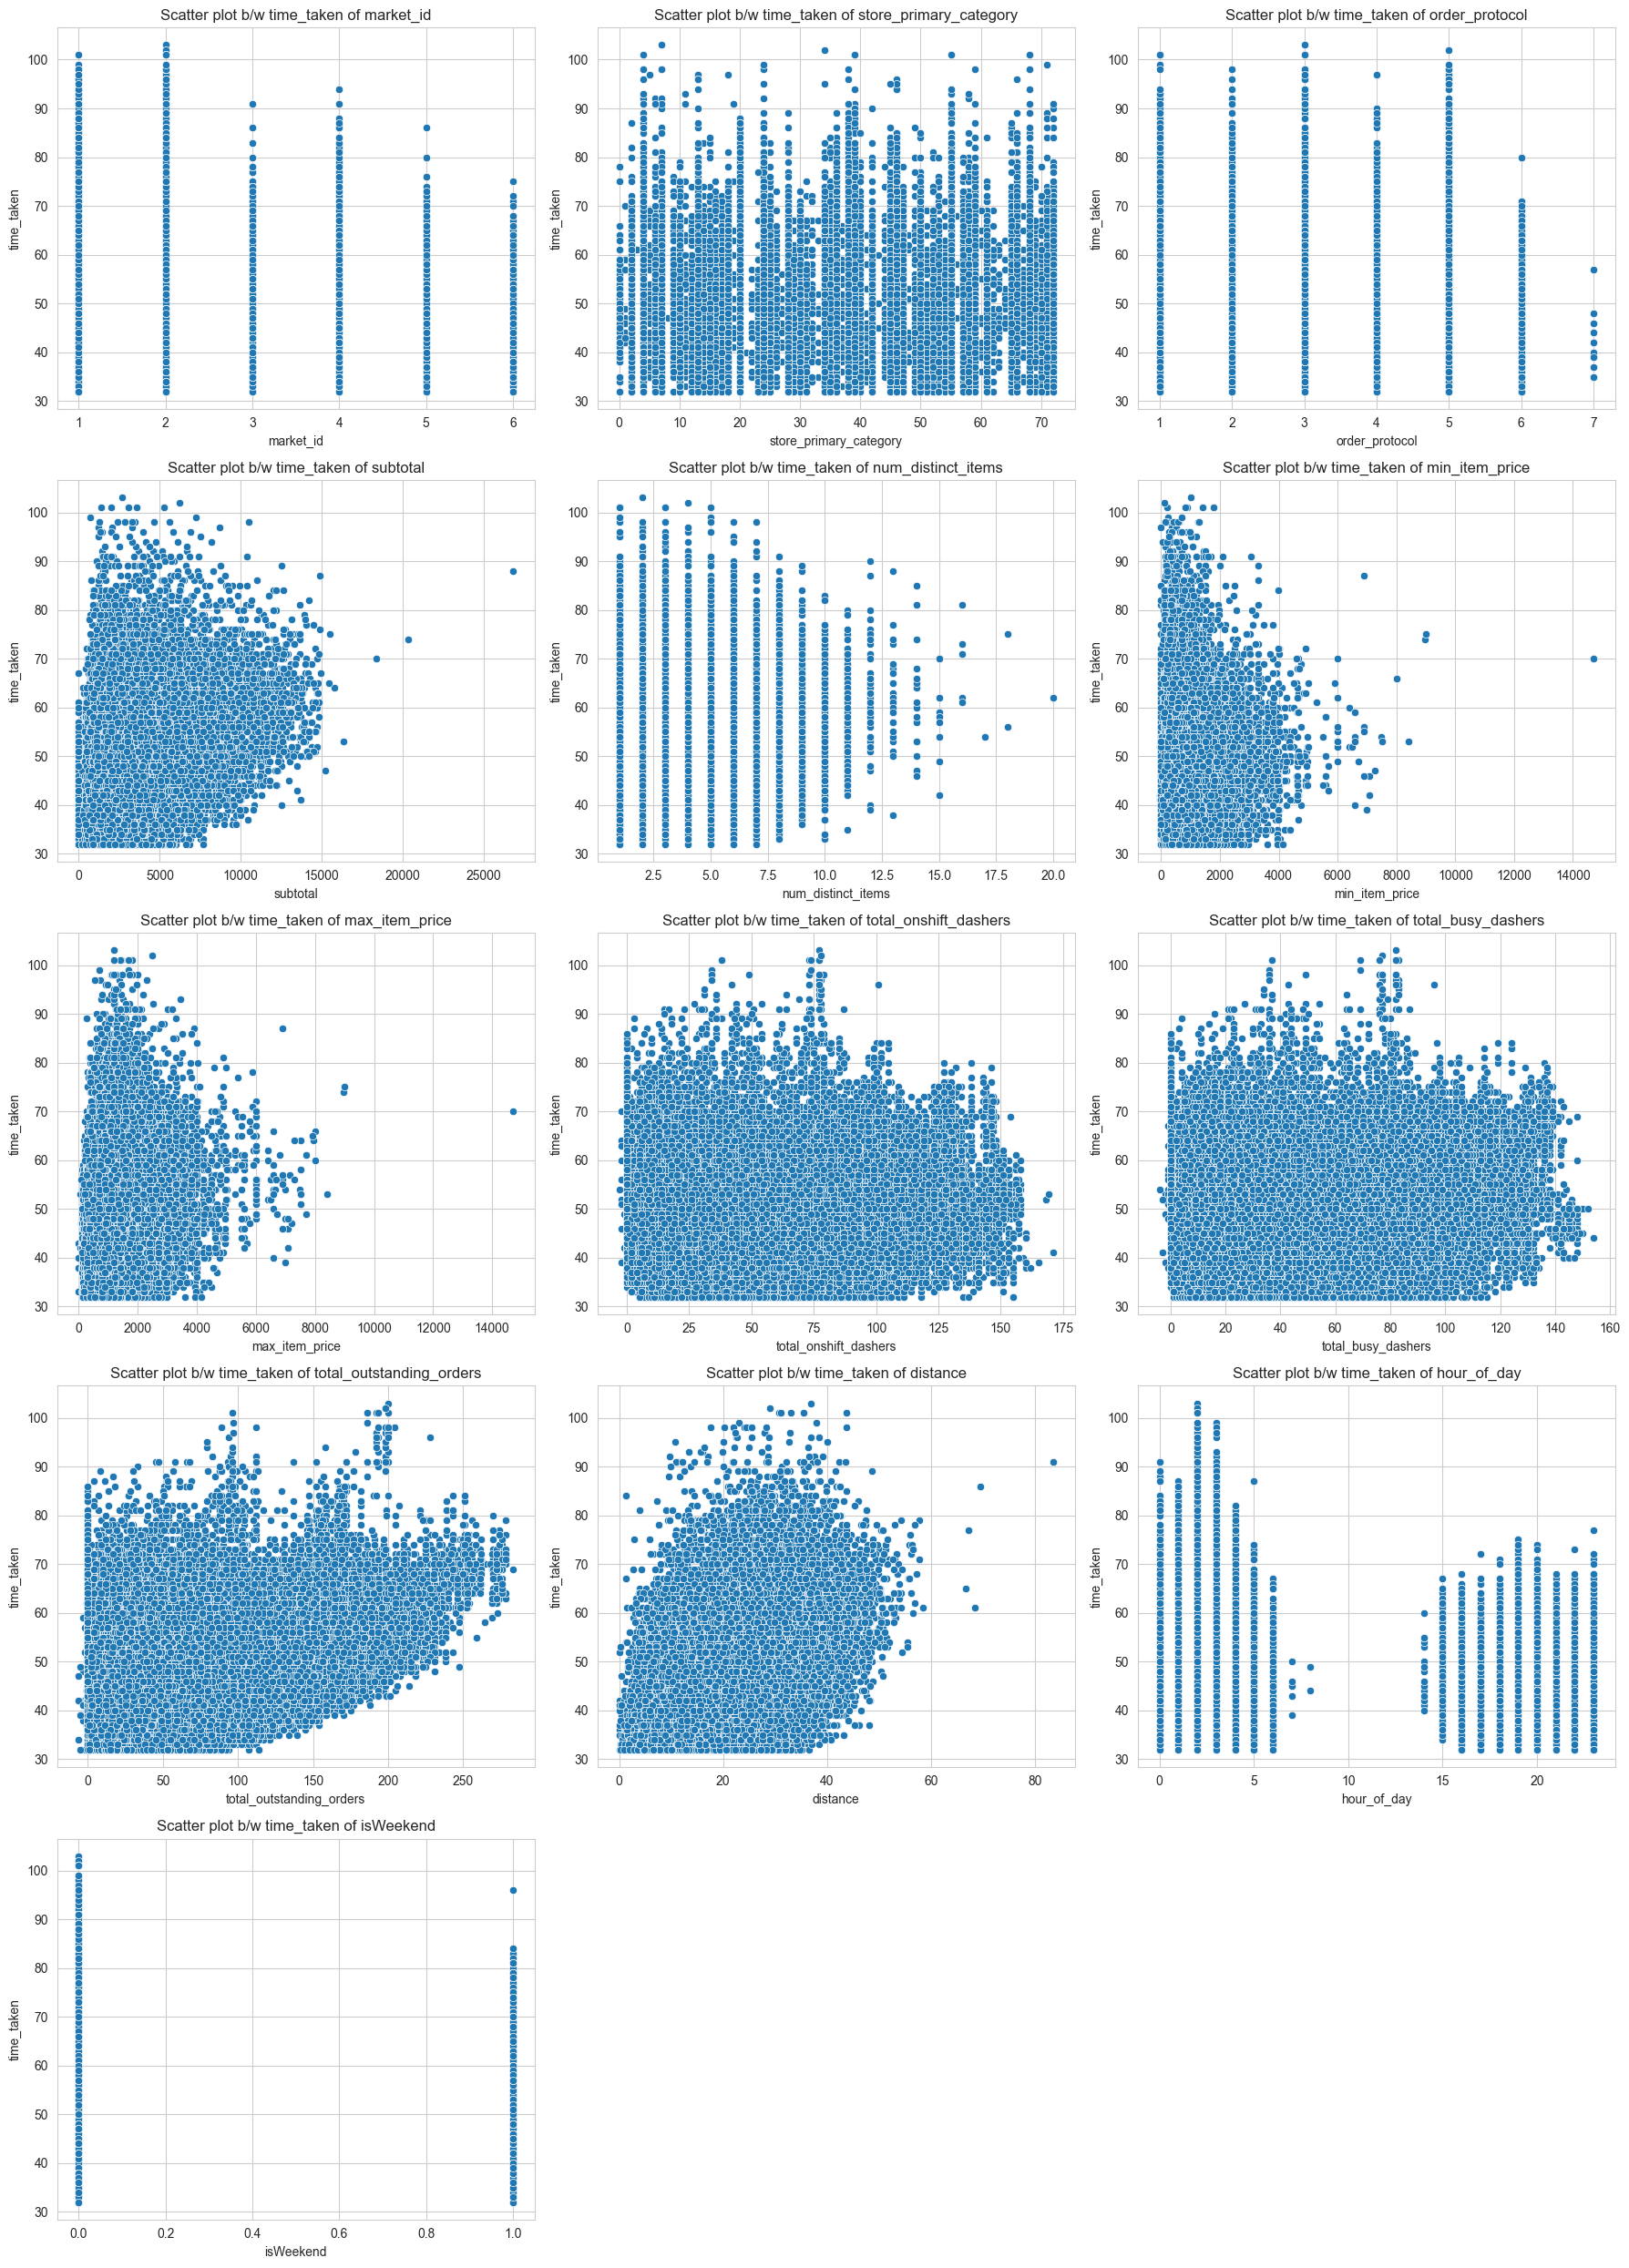

In [222]:
# Scatter plot to visualise the relationship between time_taken and other features
# not_important_or_redundant_features = ['market_id', 'store_primary_category', 'order_protocol', 'isWeekend']
# important_features = [col for col in variables_all if col not in not_important_or_redundant_features]

n_variables_cols = len(variables_all)
n_cols = 3
n_rows = (n_variables_cols + n_cols - 1) // n_cols
plt.figure(figsize=(n_cols * 6, n_rows * 5))

for i, var in enumerate(variables_all):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.scatterplot(data=porter_train, x=var, y='time_taken')
    plt.title(f'Scatter plot b/w time_taken of {var}')

plt.tight_layout()
plt.show()
# sns.pairplot(data=porter_train, x_vars=variables_all, y_vars=['time_taken'])
# plt.show()

/var/folders/gv/vp9gzv0530z5gsl8qdmlmvm00000gn/T/ipykernel_57576/748151054.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=porter_train, x='hour_of_day', y='time_taken', palette='viridis')


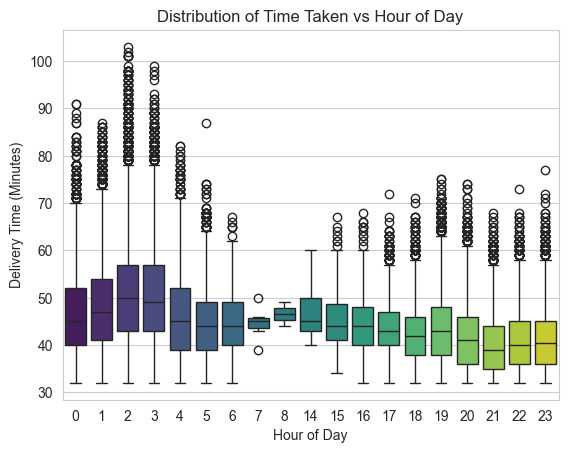

In [223]:
# Show the distribution of time_taken for different hours
# sns.histplot(data=porter_train, y='time_taken', x='hour_of_day', kde=True)
sns.boxplot(data=porter_train, x='hour_of_day', y='time_taken', palette='viridis')

plt.title('Distribution of Time Taken vs Hour of Day')
plt.ylabel('Delivery Time (Minutes)')
plt.xlabel('Hour of Day')
plt.show()


#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

<Axes: >

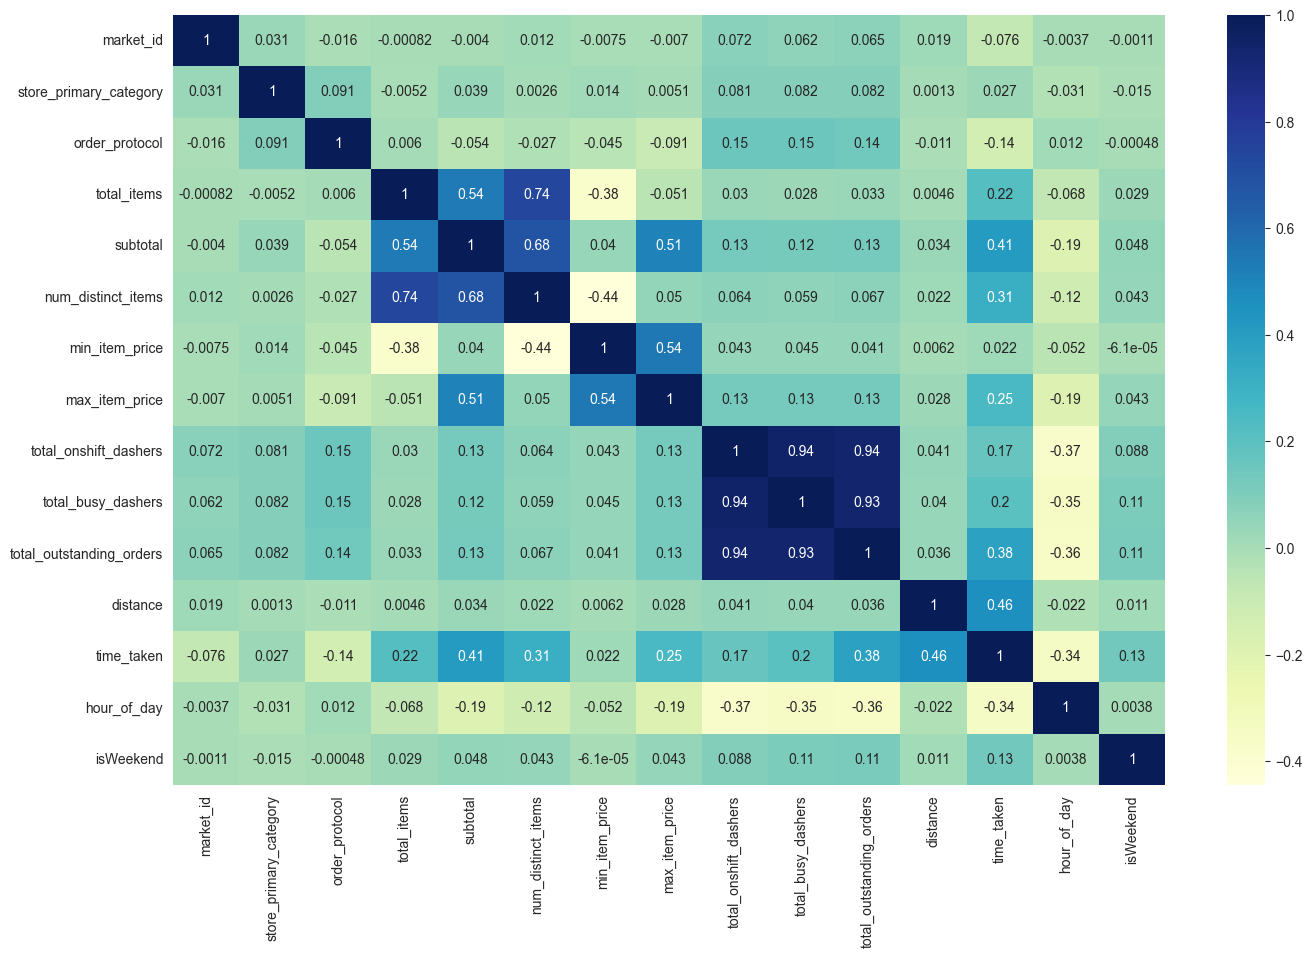

In [224]:
plt.figure(figsize=(16, 10))
porter_train.corrwith(porter_train['time_taken']).abs().sort_values(ascending=False)
corr = porter_train.corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu")

<Axes: >

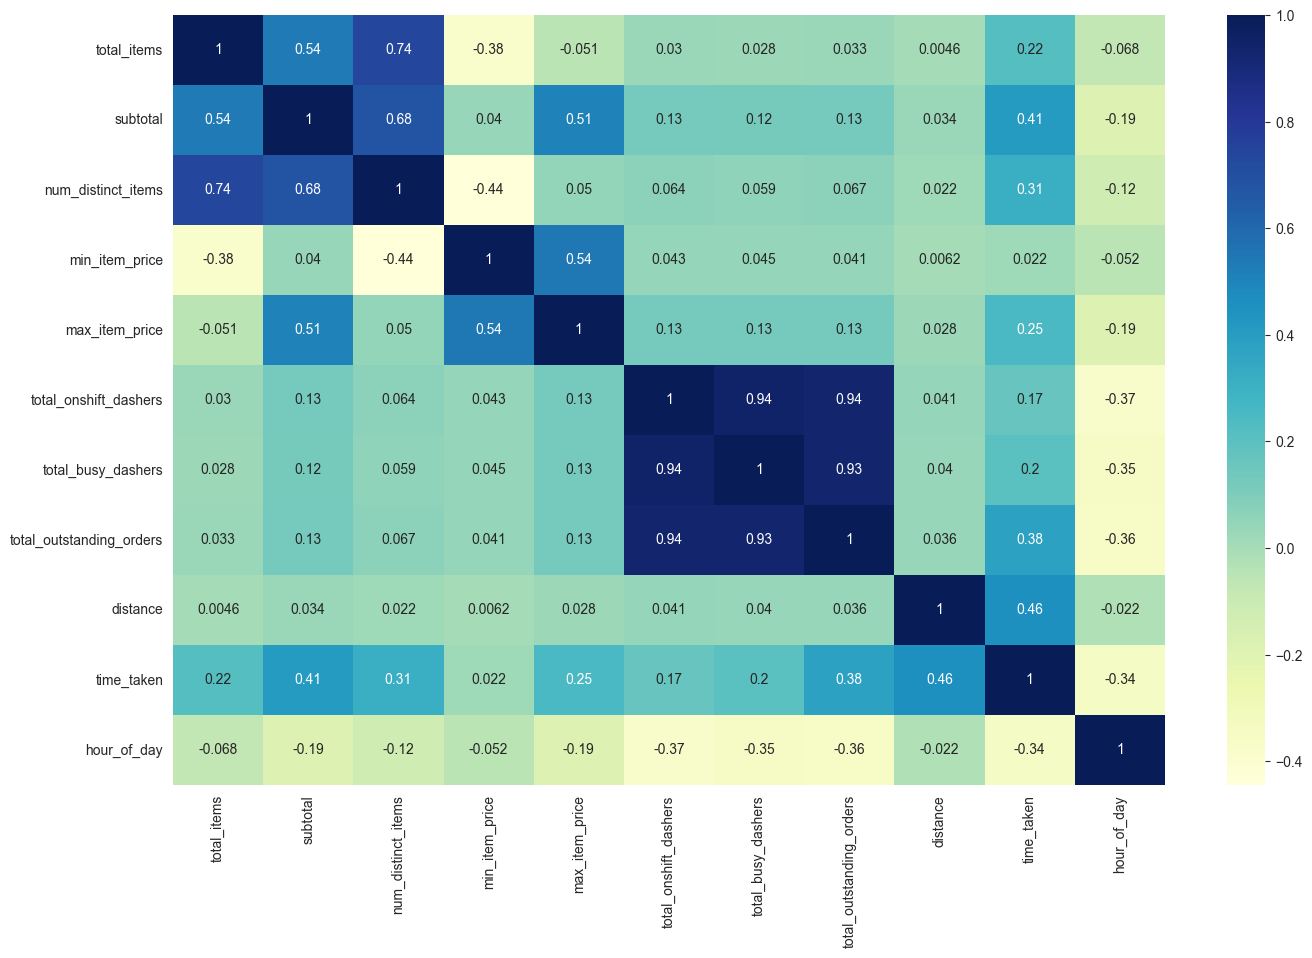

In [225]:
# Plot the heatmap of the correlation matrix
plt.figure(figsize=(16, 10))
corr = porter_train[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu")


##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [226]:
# Drop 3-5 weakly correlated columns from training dataset
correlations_with_target = porter_train.corrwith(porter_train['time_taken']).abs().sort_values(ascending=False)
columns_to_select = correlations_with_target.index.tolist()[:-3]
print(correlations_with_target)
print(f"Dropping columns: {correlations_with_target.index.tolist()[-3:]}")

porter_train = porter_train[columns_to_select]
categorical_cols = list(set(categorical_cols).intersection(set(columns_to_select)))
numerical_cols = list(set(numerical_cols).intersection(set(columns_to_select)))


time_taken                  1.000000
distance                    0.459712
subtotal                    0.412878
total_outstanding_orders    0.381642
hour_of_day                 0.344002
num_distinct_items          0.313384
max_item_price              0.254671
total_items                 0.219104
total_busy_dashers          0.202562
total_onshift_dashers       0.166812
order_protocol              0.137906
isWeekend                   0.133896
market_id                   0.075735
store_primary_category      0.027475
min_item_price              0.022281
dtype: float64
Dropping columns: ['market_id', 'store_primary_category', 'min_item_price']


#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

/var/folders/gv/vp9gzv0530z5gsl8qdmlmvm00000gn/T/ipykernel_57576/3881506915.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=porter_data[col], palette='viridis')
/var/folders/gv/vp9gzv0530z5gsl8qdmlmvm00000gn/T/ipykernel_57576/3881506915.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=porter_data[col], palette='viridis')
/var/folders/gv/vp9gzv0530z5gsl8qdmlmvm00000gn/T/ipykernel_57576/3881506915.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=porter_data[col], palette='viridis')
/var/folders/gv/vp9gzv0530z5gsl8qdmlmvm0000

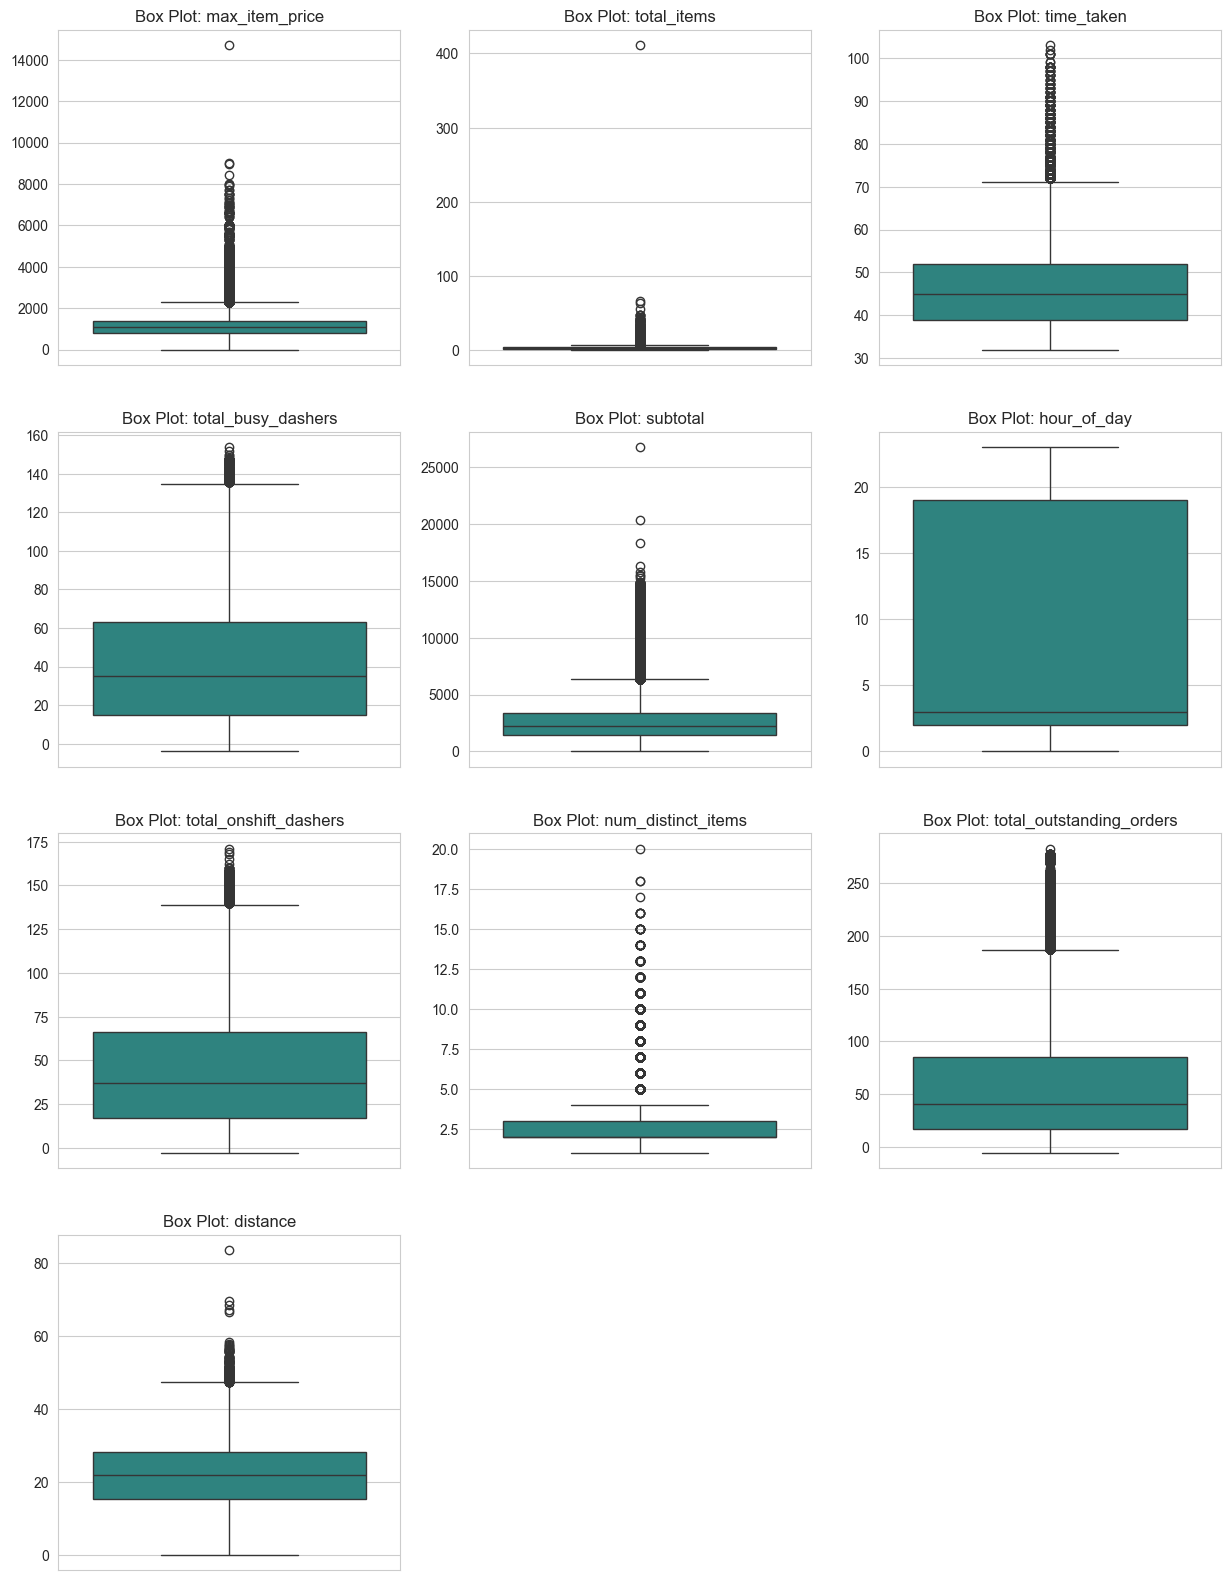

In [227]:
# Boxplot for time_taken

def plot_box_plot_for(porter_data):
    num_plots = len(numerical_cols)
    n_cols = 3
    n_rows = (num_plots + n_cols - 1) // n_cols

    sns.set_style("whitegrid")
    plt.figure(figsize=(n_cols * 5, n_rows * 5))

    for i, col in enumerate(numerical_cols):
        plt.subplot(n_rows, n_cols, i + 1)
        sns.boxplot(y=porter_data[col], palette='viridis')
        plt.title(f'Box Plot: {col}', fontsize=12)
        plt.ylabel('')
        plt.tick_params(axis='y', labelsize=10)


plot_box_plot_for(porter_train)

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

/var/folders/gv/vp9gzv0530z5gsl8qdmlmvm00000gn/T/ipykernel_57576/3881506915.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=porter_data[col], palette='viridis')
/var/folders/gv/vp9gzv0530z5gsl8qdmlmvm00000gn/T/ipykernel_57576/3881506915.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=porter_data[col], palette='viridis')
/var/folders/gv/vp9gzv0530z5gsl8qdmlmvm00000gn/T/ipykernel_57576/3881506915.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=porter_data[col], palette='viridis')
/var/folders/gv/vp9gzv0530z5gsl8qdmlmvm0000

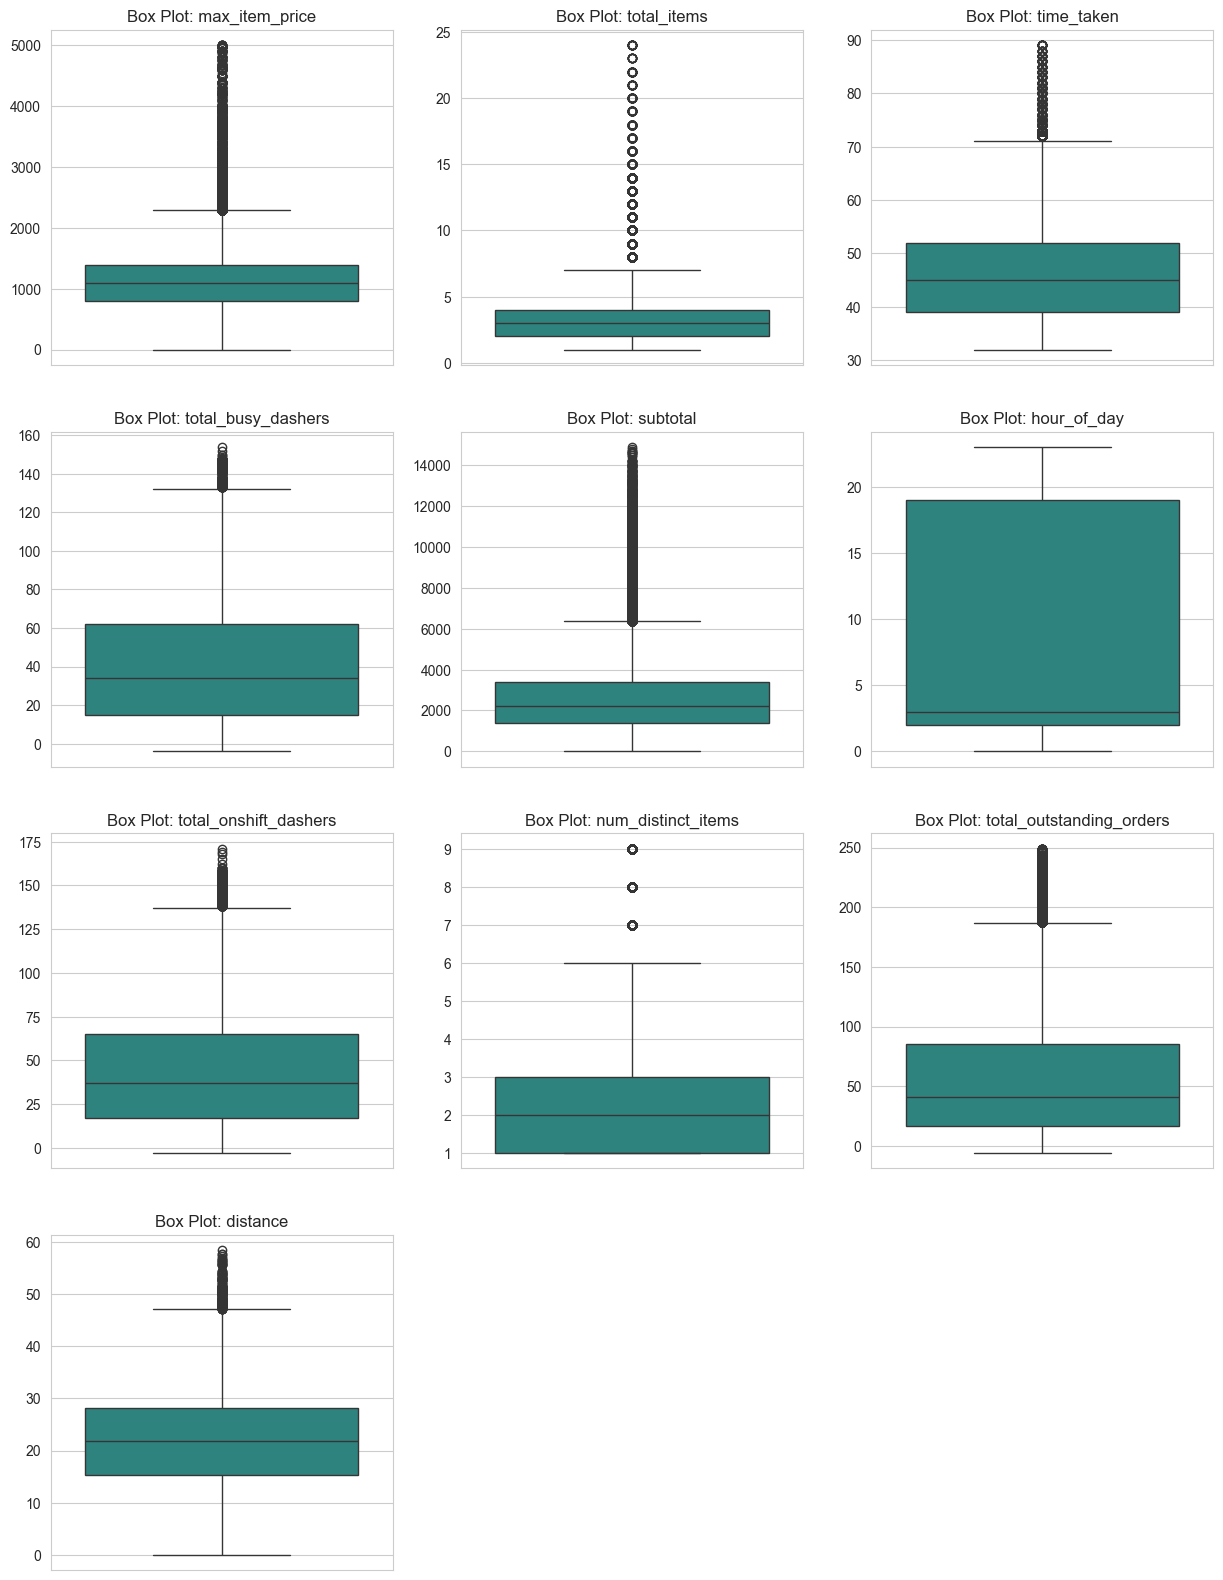

In [228]:
# Handle outliers

# distance < 60
# total_items < 25
# max_item_price < 5000
# subtotal < 15000
# total_outstanding_orders < 250
# num-distinct_items < 10
# time_taken < 90

# Remove the outliers from porter_train since it affects our model
conditions = (
        (porter_train['distance'] < 60) &
        (porter_train['total_items'] < 25) &
        (porter_train['max_item_price'] < 5000) &
        (porter_train['subtotal'] < 15000) &
        (porter_train['total_outstanding_orders'] < 250) &
        (porter_train['num_distinct_items'] < 10) &
        (porter_train['time_taken'] < 90)
)

porter_train = porter_train[conditions].copy()
plot_box_plot_for(porter_train)


## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [229]:
# Define numerical and categorical columns for easy EDA and data manipulation



#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [230]:
# Plot distributions for all numerical columns



##### **4.1.2**
Check the distribution of categorical features

In [231]:
# Distribution of categorical columns



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [232]:
# Distribution of time_taken



#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [233]:
# Scatter plot to visualise the relationship between time_taken and other features



#### **4.3** Drop the columns with weak correlations with the target variable

In [234]:
# Drop the weakly correlated columns from training dataset



## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [235]:
train_data_describe = porter_train.describe()
train_data_describe

,time_taken,distance,subtotal,total_outstanding_orders,hour_of_day,num_distinct_items,max_item_price,total_items,total_busy_dashers,total_onshift_dashers,isWeekend
count,121943.000000,121943.000000,121943.000000,121943.000000,121943.000000,121943.000000,121943.000000,121943.000000,121943.000000,121943.000000,121943.000000
mean,46.045447,21.820120,2661.428348,57.749047,8.484571,2.635895,1155.079349,3.130668,41.658119,44.761405,0.344915
std,9.157224,8.760583,1756.275661,51.810576,8.685591,1.528519,537.777190,2.203167,31.908300,34.353852,0.475343
min,32.000000,0.000000,0.000000,-6.000000,0.000000,1.000000,0.000000,1.000000,-4.000000,-3.000000,0.000000
25%,39.000000,15.320000,1400.000000,17.000000,2.000000,1.000000,799.000000,2.000000,15.000000,17.000000,0.000000
50%,45.000000,21.760000,2200.000000,41.000000,3.000000,2.000000,1095.000000,3.000000,34.000000,37.000000,0.000000
75%,52.000000,28.080000,3394.000000,85.000000,19.000000,3.000000,1395.000000,4.000000,62.000000,65.000000,1.000000
max,89.000000,58.400000,14900.000000,249.000000,23.000000,9.000000,4999.000000,24.000000,154.000000,171.000000,1.000000


In [236]:
# Import libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [237]:
# Apply scaling to the numerical columns for training data
scaler_X_train = StandardScaler()
porter_train[numerical_cols] = scaler_X_train.fit_transform(porter_train[numerical_cols])
original_feature_means = pd.Series(scaler_X_train.mean_, index=porter_train[numerical_cols].columns)
original_feature_stds = pd.Series(scaler_X_train.scale_, index=porter_train[numerical_cols].columns)
porter_train.head()

,time_taken,distance,subtotal,total_outstanding_orders,hour_of_day,num_distinct_items,max_item_price,total_items,total_busy_dashers,total_onshift_dashers,order_protocol,isWeekend
94746,-0.550982,-0.431494,-0.496182,-0.825106,1.095546,-0.416022,-0.297670,-0.513203,-1.023503,-1.011868,5.0,0
173338,-0.550982,0.280791,-1.034254,1.510334,-0.746593,-1.070253,-0.669573,-0.967097,1.076272,2.597641,5.0,1
37592,-0.223371,0.732817,-0.433549,-0.574191,1.671215,-1.070253,0.083531,-0.967097,-0.647424,-0.691669,5.0,1
42763,-0.660186,-0.906350,-1.251761,1.375226,-0.861726,0.238208,-1.591891,1.302372,1.421012,1.549719,4.0,1
27506,-0.223371,-1.577541,0.477474,-0.786504,-0.401191,0.238208,0.083531,-0.059309,-0.898144,-1.099194,1.0,1


In [238]:
# Apply scaling to the numerical columns for testing data
scaler = StandardScaler()
porter_test[numerical_cols] = scaler.fit_transform(porter_test[numerical_cols])
porter_test.head()

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,time_taken,hour_of_day,isWeekend
139667,1.0,45,1.0,-0.080938,-0.767577,-0.415327,150,-0.295977,0.412526,0.533340,0.054488,-0.150771,-0.775757,-0.632761,0
80077,1.0,4,1.0,-0.480842,0.139578,-1.030341,1225,0.117815,-0.776293,-0.770506,-0.797345,-1.037065,-0.453740,-0.863364,1
41872,1.0,46,4.0,-0.880747,-0.712764,-1.030341,1395,0.423661,-0.486337,-0.460067,-0.248386,-0.582438,0.190293,-0.632761,0
165269,4.0,24,5.0,-0.480842,0.148897,-0.415327,1097,0.160993,2.297238,2.644328,2.685707,-0.329867,0.941665,-0.632761,1
151215,4.0,6,2.0,-0.080938,-0.792243,-0.415327,375,-1.366440,-0.167386,-0.366935,-0.475541,0.556427,-0.990435,1.557967,1


Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [239]:
# Create/Initialise the model

import statsmodels.api as sm

porter_test = porter_test[porter_train.columns]

y_train = porter_train.pop('time_taken')
X_train = porter_train

y_test = porter_test.pop('time_taken')
X_test = porter_test
X_test = sm.add_constant(X_test)

X_train = sm.add_constant(X_train)
lm_1 = sm.OLS(y_train, X_train).fit()
print(lm_1.summary())


                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                 7.461e+04
Date:                Mon, 28 Jul 2025   Prob (F-statistic):               0.00
Time:                        23:21:10   Log-Likelihood:                -48331.
No. Observations:              121943   AIC:                         9.669e+04
Df Residuals:                  121931   BIC:                         9.680e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [240]:
# Train the model using the training data
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [241]:
# Make predictions
y_pred = model.predict(X_test)

/Users/jags/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/jags/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/jags/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


In [242]:
# Find results for evaluation metrics
from sklearn.metrics import r2_score, mean_absolute_error

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(r2)
print(mae)

0.8737992135500233
0.25512281252151076


/Users/jags/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/jags/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/jags/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/var/folders/gv/vp9gzv0530z5gsl8qdmlmvm00000gn/T/ipykernel_57576/1136964699.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


Text(0.5, 0, 'Errors')

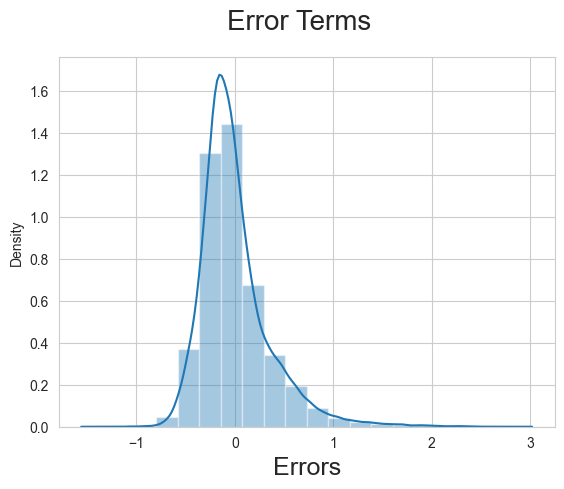

In [243]:
# Plot the histogram of the error terms
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
y_train_price = model.predict(X_train)
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins=20)
fig.suptitle('Error Terms', fontsize=20)
plt.xlabel('Errors', fontsize=18)

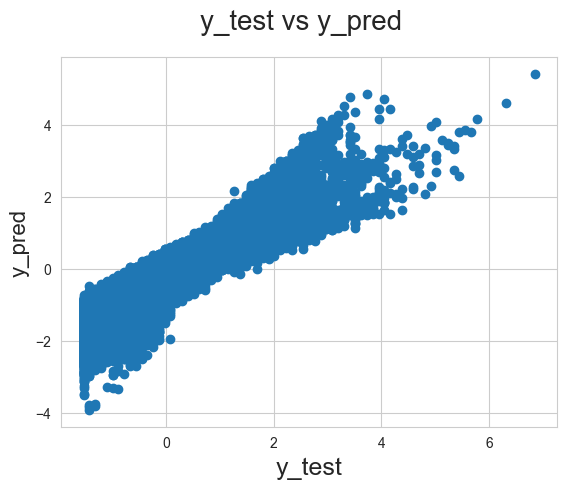

In [244]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [245]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=9)
rfe = rfe.fit(X_train, y_train)
print(list(zip(X_train.columns, rfe.support_, rfe.ranking_)))
print(X_train.columns[rfe.support_])

[('const', np.False_, np.int64(4)), ('distance', np.True_, np.int64(1)), ('subtotal', np.True_, np.int64(1)), ('total_outstanding_orders', np.True_, np.int64(1)), ('hour_of_day', np.True_, np.int64(1)), ('num_distinct_items', np.True_, np.int64(1)), ('max_item_price', np.False_, np.int64(2)), ('total_items', np.False_, np.int64(3)), ('total_busy_dashers', np.True_, np.int64(1)), ('total_onshift_dashers', np.True_, np.int64(1)), ('order_protocol', np.True_, np.int64(1)), ('isWeekend', np.True_, np.int64(1))]
Index(['distance', 'subtotal', 'total_outstanding_orders', 'hour_of_day',
       'num_distinct_items', 'total_busy_dashers', 'total_onshift_dashers',
       'order_protocol', 'isWeekend'],
      dtype='object')


In [246]:
# Loop through the number of features and test the model
X_train_rfe = X_train[['distance', 'subtotal', 'total_outstanding_orders', 'hour_of_day',
                       'num_distinct_items', 'max_item_price', 'total_items',
                       'total_busy_dashers', 'total_onshift_dashers']]

X_train_rfe = sm.add_constant(X_train_rfe)
lm_rfe = sm.OLS(y_train, X_train_rfe).fit()
print(lm_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                 7.985e+04
Date:                Mon, 28 Jul 2025   Prob (F-statistic):               0.00
Time:                        23:21:11   Log-Likelihood:                -55314.
No. Observations:              121943   AIC:                         1.106e+05
Df Residuals:                  121933   BIC:                         1.107e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [247]:
# Calculate the VIFs for the model to understand which variable has high multi-collinerity and to be dropped with high VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
8,total_onshift_dashers,11.84
7,total_busy_dashers,11.09
2,total_outstanding_orders,10.06
6,total_items,3.93
4,num_distinct_items,3.86
1,subtotal,3.59
5,max_item_price,2.05
9,order_protocol,1.39
10,isWeekend,1.39
3,hour_of_day,1.21


In [248]:
# Loop through the number of features and test the model
X_train_lm2 = X_train.drop(['total_onshift_dashers'], axis=1)  # Highest VIF multicollineratity

X_train_lm2 = sm.add_constant(X_train_lm2)
lm_2 = sm.OLS(y_train, X_train_lm2).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                 3.041e+04
Date:                Mon, 28 Jul 2025   Prob (F-statistic):               0.00
Time:                        23:21:11   Log-Likelihood:                -96752.
No. Observations:              121943   AIC:                         1.935e+05
Df Residuals:                  121932   BIC:                         1.936e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [249]:
# Re-calculate the VIFs for the model to understand which variable to be dropped

vif = pd.DataFrame()
X = X_train_lm2.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
2,total_outstanding_orders,7.85
7,total_busy_dashers,7.77
6,total_items,3.93
4,num_distinct_items,3.86
1,subtotal,3.59
5,max_item_price,2.05
9,isWeekend,1.39
8,order_protocol,1.38
3,hour_of_day,1.20
0,distance,1.00


In [250]:
# Loop through the number of features and test the model
X_train_lm3 = X_train_lm2.drop(['total_busy_dashers'], axis=1)

X_train_lm3 = sm.add_constant(X_train_lm3)
lm_3 = sm.OLS(y_train, X_train_lm3).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                 1.498e+04
Date:                Mon, 28 Jul 2025   Prob (F-statistic):               0.00
Time:                        23:21:11   Log-Likelihood:            -1.2762e+05
No. Observations:              121943   AIC:                         2.553e+05
Df Residuals:                  121933   BIC:                         2.554e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [251]:
# Re-calculate the VIFs for the model to understand which variable to be dropped

vif = pd.DataFrame()
X = X_train_lm3.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
6,total_items,3.93
4,num_distinct_items,3.86
1,subtotal,3.59
5,max_item_price,2.05
8,isWeekend,1.39
7,order_protocol,1.38
3,hour_of_day,1.20
2,total_outstanding_orders,1.17
0,distance,1.00


## Final Model - I

In [252]:
# Build the final model with selected number of features

# Since r2-score gets reduced as remove high VIF total_onshift_dashers (71.4), total_busy_dashers (52 %)
# we will go ahead with RFE suggestion to drop the least multicollinerity isWeekend, hour_of_day
# Primary goal is The key goals is Predicting the delivery time based on multiple input features, so we will go with RFE based dropping with high multicollinerity

selected_variables = ['distance', 'subtotal', 'total_outstanding_orders', 'hour_of_day',
                      'num_distinct_items', 'max_item_price', 'total_items',
                      'total_busy_dashers', 'total_onshift_dashers']
X_train_final = X_train[selected_variables]
X_train_final = sm.add_constant(X_train_final)

X_test_final = X_test[selected_variables]
X_test_final = sm.add_constant(X_test_final)

lm_final = sm.OLS(y_train, X_train_final).fit()
print(lm_final.summary())

# train the model
model = LinearRegression()
model.fit(X_train_final, y_train)

# Predict
y_pred_final = model.predict(X_test_final)


                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                 7.985e+04
Date:                Mon, 28 Jul 2025   Prob (F-statistic):               0.00
Time:                        23:21:12   Log-Likelihood:                -55314.
No. Observations:              121943   AIC:                         1.106e+05
Df Residuals:                  121933   BIC:                         1.107e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

/Users/jags/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/jags/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/jags/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


In [253]:
# Calculate the r2-score
r2 = r2_score(y_test, y_pred_final)
mae = mean_absolute_error(y_test, y_pred_final)
print(r2)
print(mae)


0.8582986825984642
0.2756703453779162


## Final Model - II

In [254]:

# Since r2-score gets reduced as remove high VIF total_onshift_dashers (71.4), total_busy_dashers (52 %)
# Primary goal is The key goals is Predicting the delivery time based on multiple input features, and making sure the stability of the model so we will drop the total_onshift_dashers alone to see the prediction

# Build the final model with selected number of features

# Since r2-score gets reduced as remove high VIF total_onshift_dashers (71.4), total_busy_dashers (52 %)
# we will go ahead with RFE suggestion to drop the least multicollinerity isWeekend, hour_of_day
# Primary goal is The key goals is Predicting the delivery time based on multiple input features, so we will go with RFE based dropping with high multicollinerity

X_train_final_2 = X_train.drop(['total_onshift_dashers'], axis=1)
X_train_final_2 = sm.add_constant(X_train_final_2)

X_test_final_2 = X_test.drop(['total_onshift_dashers'], axis=1)
X_test_final_2 = sm.add_constant(X_test_final_2)

lm_final_2 = sm.OLS(y_train, X_train_final_2).fit()
print(lm_final_2.summary())

# train the model
model_2 = LinearRegression()
model_2.fit(X_train_final_2, y_train)

# Predict
y_pred_final_2 = model_2.predict(X_test_final_2)


                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                 3.041e+04
Date:                Mon, 28 Jul 2025   Prob (F-statistic):               0.00
Time:                        23:21:12   Log-Likelihood:                -96752.
No. Observations:              121943   AIC:                         1.935e+05
Df Residuals:                  121932   BIC:                         1.936e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

/Users/jags/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/jags/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/jags/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


In [255]:
# Calculate the r2-score for the model 2
r2 = r2_score(y_test, y_pred_final_2)
mae = mean_absolute_error(y_test, y_pred_final_2)
print(r2)
print(mae)

0.7184504912236586
0.3914231812309688


/var/folders/gv/vp9gzv0530z5gsl8qdmlmvm00000gn/T/ipykernel_57576/1269193532.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors_2, bins=20)


Text(0.5, 0, 'Errors')

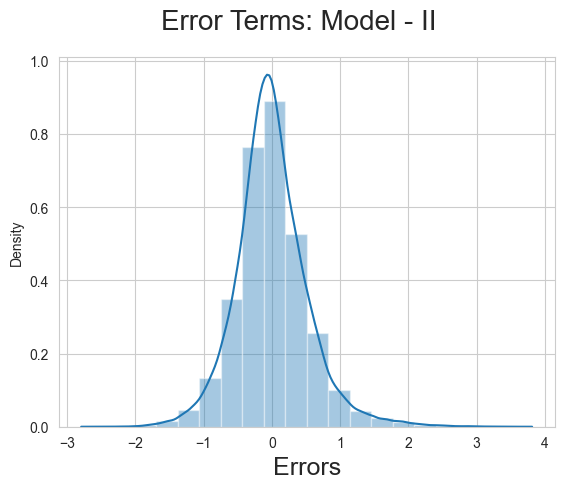

In [256]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram
# Plot the histogram of the error terms - residual histogram
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
y_train_price_lm2 = lm_final_2.predict(X_train_final_2)
fig = plt.figure()
errors_2 = (y_train - y_train_price_lm2)
sns.distplot(errors_2, bins=20)
fig.suptitle('Error Terms: Model - II', fontsize=20)
plt.xlabel('Errors', fontsize=18)

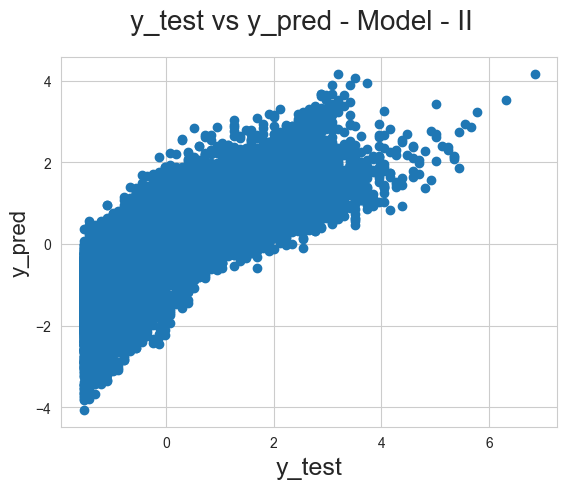

In [257]:
# Plotting y_test and y_pred to understand the spread. - residuals vs predicted values
fig = plt.figure()
plt.scatter(y_test, y_pred_final_2)
fig.suptitle('y_test vs y_pred - Model - II', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

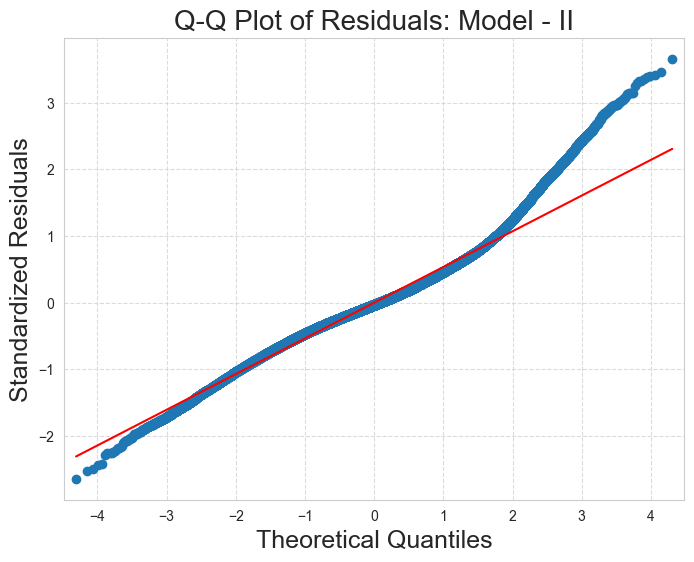

In [258]:
# Q-Q Plot
plt.figure(figsize=(8, 6))
sm.qqplot(errors_2, line='s', ax=plt.gca())
plt.title('Q-Q Plot of Residuals: Model - II', fontsize=20)
plt.xlabel('Theoretical Quantiles', fontsize=18)
plt.ylabel('Standardized Residuals', fontsize=18)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## Final Model - III

In [259]:

# Since r2-score gets reduced as remove high VIF total_onshift_dashers (71.4), total_busy_dashers (52 %)
# Primary goal is The key goals is Predicting the delivery time based on multiple input features, and making sure the stability of the model so we will drop the total_onshift_dashers alone to see the prediction

# Build the final model with selected number of features

# Since r2-score gets reduced as remove high VIF total_onshift_dashers (71.4), total_busy_dashers (52 %)
# we will go ahead with RFE suggestion to drop the least multicollinerity isWeekend, hour_of_day
# Primary goal is The key goals is Predicting the delivery time based on multiple input features, so we will go with RFE based dropping with high multicollinerity

X_train_final_3 = X_train.drop(
    ['total_onshift_dashers', 'subtotal', 'num_distinct_items', 'order_protocol', 'hour_of_day', 'isWeekend'], axis=1)
X_train_final_3 = sm.add_constant(X_train_final_3)

X_test_final_3 = X_test.drop(
    ['total_onshift_dashers', 'subtotal', 'num_distinct_items', 'order_protocol', 'hour_of_day', 'isWeekend'], axis=1)
X_test_final_3 = sm.add_constant(X_test_final_3)

lm_final_3 = sm.OLS(y_train, X_train_final_3).fit()
print(lm_final_3.summary())

# train the model
model_3 = LinearRegression()
model_3.fit(X_train_final_3, y_train)

# Predict
y_pred_final_3 = model_3.predict(X_test_final_3)


                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                 4.188e+04
Date:                Mon, 28 Jul 2025   Prob (F-statistic):               0.00
Time:                        23:21:12   Log-Likelihood:            -1.1208e+05
No. Observations:              121943   AIC:                         2.242e+05
Df Residuals:                  121937   BIC:                         2.242e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

/Users/jags/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/jags/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/jags/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


In [260]:
vif = pd.DataFrame()
X = X_train_final_3.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
1,total_outstanding_orders,7.76
4,total_busy_dashers,7.75
2,max_item_price,1.02
3,total_items,1.01
0,distance,1.00


In [261]:
# Calculate the r2-score for the model 2
r2 = r2_score(y_test, y_pred_final_3)
mae = mean_absolute_error(y_test, y_pred_final_3)
print(r2)
print(mae)

0.631216235753594
0.4641085777254082


/var/folders/gv/vp9gzv0530z5gsl8qdmlmvm00000gn/T/ipykernel_57576/206479185.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors_3, bins=20)


Text(0.5, 0, 'Errors')

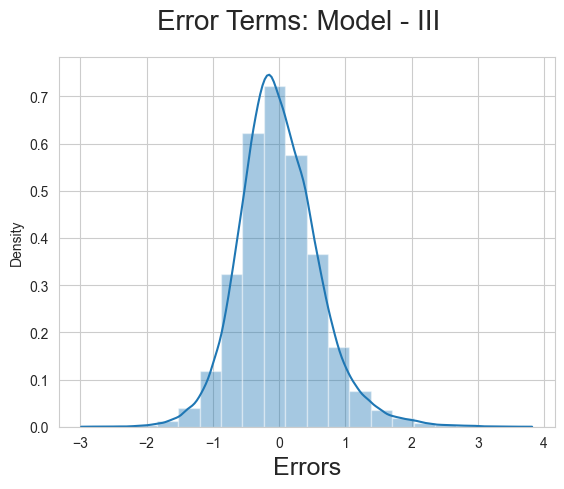

In [262]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram
# Plot the histogram of the error terms - residual histogram
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
y_train_price_lm3 = lm_final_3.predict(X_train_final_3)
fig = plt.figure()
errors_3 = (y_train - y_train_price_lm3)
sns.distplot(errors_3, bins=20)
fig.suptitle('Error Terms: Model - III', fontsize=20)
plt.xlabel('Errors', fontsize=18)

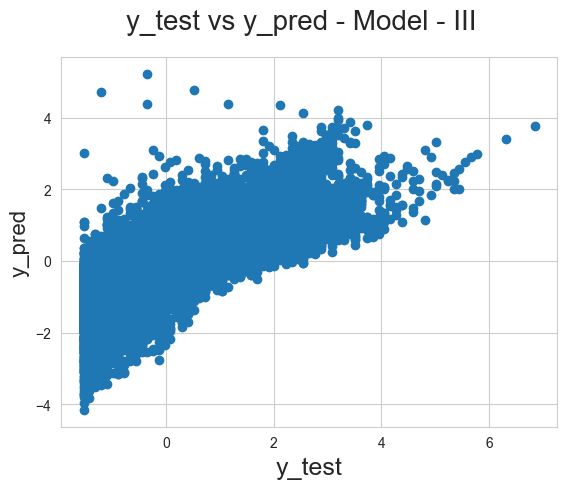

In [263]:
# Plotting y_test and y_pred to understand the spread. - residuals vs predicted values
fig = plt.figure()
plt.scatter(y_test, y_pred_final_3)
fig.suptitle('y_test vs y_pred - Model - III', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

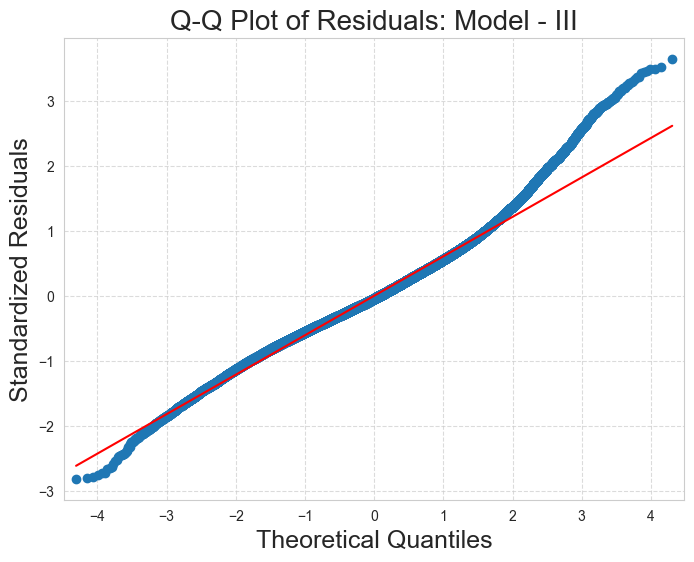

In [264]:
# Q-Q Plot
plt.figure(figsize=(8, 6))
sm.qqplot(errors_3, line='s', ax=plt.gca())
plt.title('Q-Q Plot of Residuals: Model - III', fontsize=20)
plt.xlabel('Theoretical Quantiles', fontsize=18)
plt.ylabel('Standardized Residuals', fontsize=18)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

/Users/jags/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/jags/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/jags/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/var/folders/gv/vp9gzv0530z5gsl8qdmlmvm00000gn/T/ipykernel_57576/697347505.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



Text(0.5, 0, 'Errors')

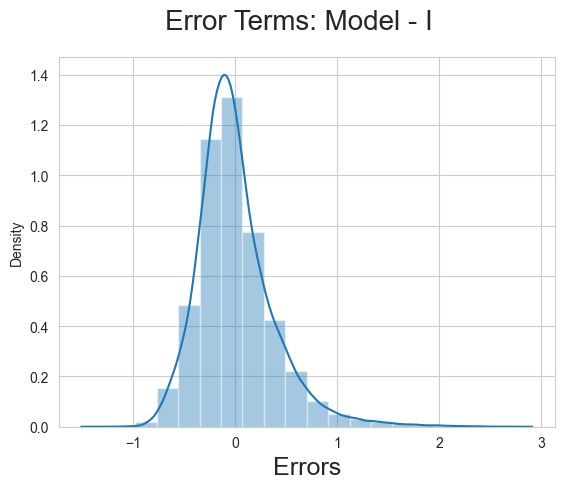

In [265]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram
# Plot the histogram of the error terms - residual histogram
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
y_train_price = model.predict(X_train_final)
fig = plt.figure()
errors = (y_train - y_train_price)
sns.distplot(errors, bins=20)
fig.suptitle('Error Terms: Model - I', fontsize=20)
plt.xlabel('Errors', fontsize=18)


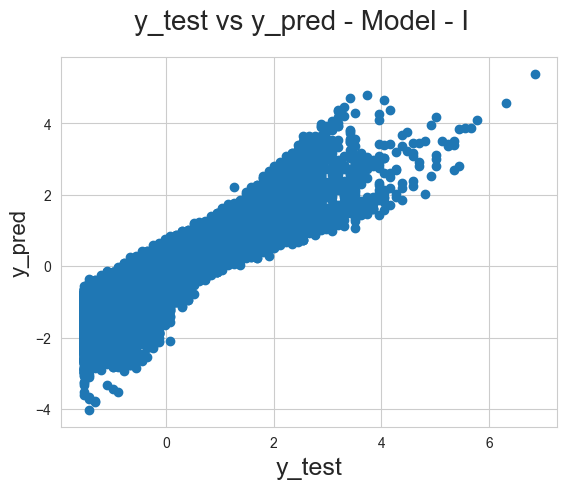

In [266]:
# Plotting y_test and y_pred to understand the spread. - residuals vs predicted values
fig = plt.figure()
plt.scatter(y_test, y_pred_final)
fig.suptitle('y_test vs y_pred - Model - I', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

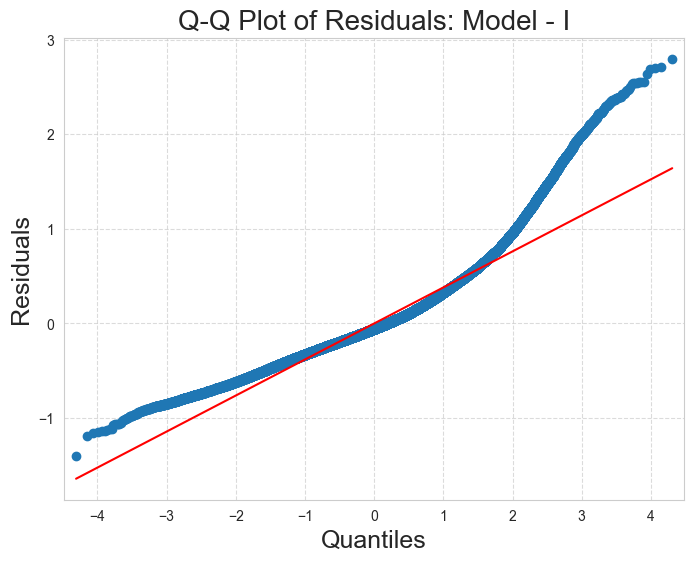

In [267]:
# Q-Q Plot
plt.figure(figsize=(8, 6))
sm.qqplot(errors, line='s', ax=plt.gca())
plt.title('Q-Q Plot of Residuals: Model - I', fontsize=20)
plt.xlabel('Quantiles', fontsize=18)
plt.ylabel('Residuals', fontsize=18)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

[Jagdsh's inferences:]

#### Inference from Residuals Histogram (Error Terms)
- The peak is to the left of zero (around -0.05 to 0), suggesting that the model tends to overpredict.
- It is nearly bell curve, however it extends to the positive side.
- the mean error is nearly zero, however little to the negative side.

#### Inference from Plotting y_test and y_pred (Residuals vs. Predicted Values )
- But it clearly says most of the variables
- The residuals are not randomly scattered around the horizontal line.
- The graph is not scatted compared to the #Final Model II where we drop 'total_onshift_dashers'. This is a tade-off we are gonna take for prediction

#### Inference from Q-Q (Quantile-Quantile) plot
- The tail and head is not touching the nomral line.
- non Normality of residuals at the start and end of the line.

#### VIF:
- From the Variance Inflation Factor (VIF) it is very clear that "total_onshift_dashers" has more multicollinearity once we remove the r2 comes to 71.4% and once we remove "total_busy_dashers" it comes around 52.5%
- These two fields total_onshift_dashers, total_busy_dashers has high multi collinearity and influences other variables as well.


#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [268]:
# Compare the scaled vs unscaled features used in the final model

# - For every 1 std dev increase in total_items, time_taken decreases by 0.02 std devs. This is a very small effect.
# - For every 1 std dev increase in total_outstanding_orders, time_taken increase by 1.98 std devs. This is the strongest positive driver of time_taken among all features
# - For every 1 std dev increase in total_onshift_dashers, time_taken decreases by 1.39 std devs. This is the strongest negative driver of time_taken.
# - For every 1 std dev increase in subtotal, time_taken increase by 0.24 std devs. This is a medium driver of time_taken.
# - For every 1 std dev increase in distance, time_taken increase by 0.46 std devs. This is a medium driver of time_taken.
# - For every 1 std dev increase in hour_of_day, time_taken decreases by 0.24 std devs. This is a medium driver of time_taken.
# - For every 1 std dev increase in num_distinct_items, time_taken increase by 0.01 std devs. This is a medium driver of time_taken.
# - For every 1 std dev increase in max_item_price, time_taken increase by 0.05 std devs. This is a medium driver of time_taken.
# - For every 1 std dev increase in total_busy_dashers, time_taken decreases by 0.5 std devs. This is a medium driver of time_taken.


scaled_coefs = lm_final.params.drop('const')
scaled_intercept = lm_final.params['const']

unscaled_feature_coefs = {}
sum_for_unscaled_intercept = 0

for feature, scaled_b in scaled_coefs.items():
    unscaled_b = scaled_b / original_feature_stds[feature]
    unscaled_feature_coefs[feature] = unscaled_b
    sum_for_unscaled_intercept += (unscaled_b * original_feature_means[feature])
    print(f"Coef for {feature} Scaled: {scaled_b:.2f} Unscaled: {unscaled_b:.2f}")


Coef for distance Scaled: 0.46 Unscaled: 0.05
Coef for subtotal Scaled: 0.24 Unscaled: 0.00
Coef for total_outstanding_orders Scaled: 1.99 Unscaled: 0.04
Coef for hour_of_day Scaled: -0.24 Unscaled: -0.03
Coef for num_distinct_items Scaled: 0.10 Unscaled: 0.06
Coef for max_item_price Scaled: 0.05 Unscaled: 0.00
Coef for total_items Scaled: -0.02 Unscaled: -0.01
Coef for total_busy_dashers Scaled: -0.50 Unscaled: -0.02
Coef for total_onshift_dashers Scaled: -1.39 Unscaled: -0.04


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [269]:
### Analyze the effect of a unit change in a feature, say 'total_items'

In [270]:
unit_map = {
    'distance': 'km',
    'subtotal': 'price',
    'total_outstanding_orders': 'order',
    'hour_of_day': 'hour',
    'num_distinct_items': 'item',
    'max_item_price': 'price',
    'total_items': 'item',
    'total_busy_dashers': 'dasher',
    'total_onshift_dashers': 'dasher',
}
for feature, scaled_b in scaled_coefs.items():
    impact = "increase"
    if scaled_b < 0:
        impact = "decrease"
    print(
        f"For every 1 {unit_map[feature]} increase in {feature}, time_taken is expected to {impact} by approximately {scaled_b:.2f} minutes")


For every 1 km increase in distance, time_taken is expected to increase by approximately 0.46 minutes
For every 1 price increase in subtotal, time_taken is expected to increase by approximately 0.24 minutes
For every 1 order increase in total_outstanding_orders, time_taken is expected to increase by approximately 1.99 minutes
For every 1 hour increase in hour_of_day, time_taken is expected to decrease by approximately -0.24 minutes
For every 1 item increase in num_distinct_items, time_taken is expected to increase by approximately 0.10 minutes
For every 1 price increase in max_item_price, time_taken is expected to increase by approximately 0.05 minutes
For every 1 item increase in total_items, time_taken is expected to decrease by approximately -0.02 minutes
For every 1 dasher increase in total_busy_dashers, time_taken is expected to decrease by approximately -0.50 minutes
For every 1 dasher increase in total_onshift_dashers, time_taken is expected to decrease by approximately -1.39 mi

Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
> The categrorical columns are 'market_id', 'store_primary_category', 'order_protocol', 'isWeekend' has detectable effect however weak in linear correlation with time_taken. Since they have low correlation with time_taken -0.076, 0.027, -0.14, 0.13 respectively. And in the Recursive Feature Elimination (RFE) the numerical column have more contribution on the time_taken than any other categorical variables.
> P>|t| values of all the categorical values are 0.000 meaning that non-random effect on the model



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
> test_size =0.2 means to split 20% of the total data as test data. And keep other 80% as training data.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
- "total_onshift_dashers" and "total_busy_dashers" => 0.94
- "total_onshift_dashers" and "total_outstanding_orders" => 0.94
- "total_outstanding_orders" and "total_busy_dashers" => 0.93
- "num_distinct_items" and "total_items" => 0.74



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

> I used boxplot to identify the outliers and I removed the values which are way out of line
> I arrived an optimal threshold in accepting few outliers on individual features, so that I can use StandardScaler

```
        ('distance' < 60)
        ('total_items' < 25)
        ('max_item_price' < 5000)
        ('subtotal' < 15000)
        ('total_outstanding_orders' < 250)
        ('num_distinct_items' < 10)
        ('time_taken' < 90)
```



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
> The top three significantly affecting delivery time in the decreasing order, first being the most significant
- total_outstanding_orders -> positive correlation
- total_onshift_dashers -> negative correlation
- total_busy_dashers -> negative correlation



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
> It is supervised predictive analysis model which establishes between one scaler (dependant) variable and one or more independant variables.
> Since it is supervised learning you label the training data and feed the model
> It is a fundamental and most used model for predicting is a continuous variable, e.g. scores of a student, time_taken in delivery.
> It attempts to draw a "best-fit" straight line through the data points.
> There are two main types:
- Simple Linear Regression (SLR): Involves only one independent variable.
- Multiple Linear Regression (MLR): Involves two or more independent variables
> Linear regression guarantes interpolation then extrapolation
> There are few assumptions of OLS Linear Regression that must be satisfied
- Linear relationship between X and Y
- Error terms are normally distributed (not X, Y)
- Error terms are independent of each other
- Error terms have constant variance (homoscedasticity)






---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
> Simple Linear Regression (SLR): Involves only one independent variable while
> the equation for SLR is `Y=Beta0 + Beta1X + constant` since there is only one independe variable, only one X with coefficient
> Main purpose of using this to model is to fit a straight-line relationship between two continuous variables and predict the target based on changes in that single feature.
> Use Cases: When only one factor significantly influences the outcome, or for initial exploratory analysis of pairwise relationships

> Multiple Linear Regression (MLR): Involves two or more independent variables
> MLR equat is similar and goes like `Y=Beta0 + Beta1X1 + Beta2X2 + Beta3X3 + .... + BetanXn + constant` where X1 ... Xn are the multiple independent variables
> Main purpose of using this to model the linear relationship between a dependent variable and several predictors, allowing for a more comprehensive and often more accurate prediction by considering multiple influencing factors simultaneously.
> use cases: predicting house prices based on square footage, number of bedrooms, number of bathrooms, and location. Delivery time prediction model is a classic example of MLR.



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
> The main goal of cost function is to predict the errors between the values predicted and the actual vales. This is created to evaluate the model efficiency. And the process involves minimizing the cost function
> Ways to minimize the cost function (RSS)
- Differentiation: e.g Ordinary Least Squares (OLS)
- Gradient Descent Appxoach: e.g R2

> Find the optimized Beta0, Beta1 and use it in the susequent prediction
> Residual Sum of Squares (RSS) will be minimal for the best fit line, and Total sum of squares (TSS) will be higher
> R2 = 1 - (RSS / TSS)




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

> When we hear Model may ‘overfit’ means that Model fits the train set ‘too well’, doesn’t generalize and does not predict well in unknow dataset.
> It might give right data in the training dataset, while in test data it might not perform well.
> It essentially memorizes the training data instaed of generalizing
> Common cause : Complex model, noisy, insufficient data set, making it too much perfect.

> it is just opposite of overfit, Underfitting means the model is too simple to capture relationships in the training data. It fails to learn from the data adequately.
> When if we have the right data in the training dataset, the model does understand the varies varibles and contribute
> Common cause : Insufficient features, model is simple, Over-regularization



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
> Residual plots are used for diagnosing linear regression models. They visually represent the errors (residuals) of the  model, allowing to check whether the underlying assumptions of Ordinary Least Squares (OLS) regression hold true. Residuals vs. Predicted Values Plot

> A random scatter of points around the horizontal line at zero
> Common Problems (Patterns) to help understand the model

- Curved/Non-linear Pattern (e.g., U-shape, inverted U-shape): Indicates that the relationship between the variables is not linear, and a linear model is likely missing an important curve or trend. The model might be biased
- Funnel/Cone Shape: Indicates heteroscedasticity The spread of the residuals either increases or decreases as the predicted values change.